In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc


In [2]:
import numpy as np

id_scores_vim = np.load("../results/id_scores_vim.npy")
ood_scores_vim = np.load("../results/ood_scores_vim.npy")
id_scores_msp = np.load("../results/id_scores_msp.npy")
ood_scores_msp = np.load("../results/ood_scores_msp.npy")


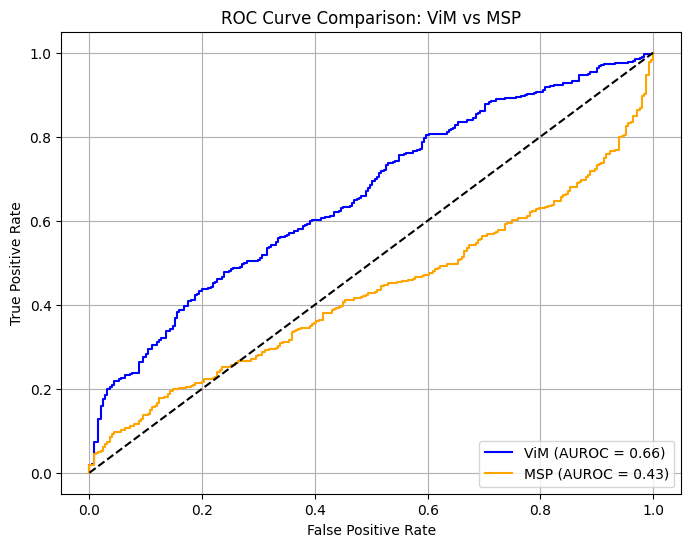

In [3]:
# === Combine scores ===
vim_labels = np.array([0] * len(id_scores_vim) + [1] * len(ood_scores_vim))
vim_scores = np.concatenate([id_scores_vim, ood_scores_vim])

msp_labels = np.array([0] * len(id_scores_msp) + [1] * len(ood_scores_msp))
msp_scores = np.concatenate([id_scores_msp, ood_scores_msp])

# === Compute ROC ===
fpr_vim, tpr_vim, _ = roc_curve(vim_labels, vim_scores)
auc_vim = auc(fpr_vim, tpr_vim)

fpr_msp, tpr_msp, _ = roc_curve(msp_labels, msp_scores)
auc_msp = auc(fpr_msp, tpr_msp)

# === Plot combined ROC ===
plt.figure(figsize=(8, 6))
plt.plot(fpr_vim, tpr_vim, label=f"ViM (AUROC = {auc_vim:.2f})", color='blue')
plt.plot(fpr_msp, tpr_msp, label=f"MSP (AUROC = {auc_msp:.2f})", color='orange')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison: ViM vs MSP")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
